In [1]:
#Convolutional Neural Network

In [1]:
#importing libraries
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
data = pd.read_csv('TrueFinal.csv')

# data.head()

In [3]:
data.head()
unique, counts = np.unique(data.iloc[:,0], return_counts=True)
dict(zip(unique, counts))


{0: 912, 1: 885}

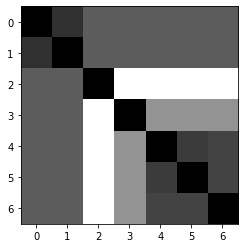

In [5]:
#reshaping into array
plt.imshow(data.iloc[4,1:].values.reshape(7,7).astype('uint8'),cmap="gray")

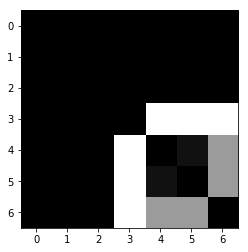

In [5]:
plt.imshow(data.iloc[0,1:].values.reshape(7,7).astype('uint16'),cmap="gray")

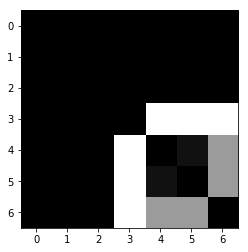

In [6]:
plt.imshow(data.iloc[0,1:].values.reshape(7,7),cmap="gray")

In [7]:
data.iloc[0,1:].values.reshape(7,7).astype('uint8')

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19, 19, 19],
       [ 0,  0,  0, 19,  0, 36, 67],
       [ 0,  0,  0, 19, 36,  0, 67],
       [ 0,  0,  0, 19, 67, 67,  0]], dtype=uint8)

In [8]:
data.iloc[0,1:].values.reshape(7,7)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 531., 531., 531.],
       [  0.,   0.,   0., 531.,   0.,  36., 323.],
       [  0.,   0.,   0., 531.,  36.,   0., 323.],
       [  0.,   0.,   0., 531., 323., 323.,   0.]])

In [9]:
#preprocessing data 

In [10]:
#Storing Pixel array in form length width and channel in df_x
df_x = data.iloc[:,1:].values.reshape(len(data),7,7,1).astype('uint8')/255

#Storing the labels in y
df_y = pd.get_dummies(data.iloc[:,0].values) # changed y to df_y

In [11]:
#Converting labels to categorical features

#df_y = keras.utils.to_categorical(y,num_classes=2)

In [12]:
df_x = np.array(df_x)
df_y = np.array(df_y)

In [13]:
#categorical labels
print(data.iloc[:,0].values)
df_y

[0 0 0 ... 0 0 0]


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [14]:
df_x.shape

(1797, 7, 7, 1)

In [15]:
#test train split

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.1,random_state=4)

In [16]:
#CNN model
model = Sequential()
model.add(Convolution2D(32,kernel_size=(1,1),data_format='channels_last',padding="same",input_shape=(7,7,1)))
#model.add(Convolution2D(32,kernel_size=(1,1),padding="same",input_shape=(7,7,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (1, 1), padding="same"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Convolution2D(128, (1, 1), padding="same"))
#model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 7, 7, 32)          64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                28850     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
__________

In [18]:
#fitting it

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25)

Train on 1617 samples, validate on 180 samples
Epoch 1/25
1617/1617 [==============================] - 1s 561us/step - loss: 0.3814 - acc: 0.8361 - val_loss: 0.1964 - val_acc: 0.9389
Epoch 2/25
1617/1617 [==============================] - 0s 90us/step - loss: 0.2686 - acc: 0.8949 - val_loss: 0.1822 - val_acc: 0.9389
Epoch 3/25
1617/1617 [==============================] - 0s 93us/step - loss: 0.2488 - acc: 0.9079 - val_loss: 0.1662 - val_acc: 0.9444
Epoch 4/25
1617/1617 [==============================] - 0s 89us/step - loss: 0.2326 - acc: 0.9147 - val_loss: 0.1618 - val_acc: 0.9500
Epoch 5/25
1617/1617 [==============================] - 0s 89us/step - loss: 0.2244 - acc: 0.9159 - val_loss: 0.1270 - val_acc: 0.9611
Epoch 6/25
1617/1617 [==============================] - 0s 91us/step - loss: 0.2241 - acc: 0.9184 - val_loss: 0.1616 - val_acc: 0.9444
Epoch 7/25
1617/1617 [==============================] - 0s 94us/step - loss: 0.2143 - acc: 0.9177 - val_loss: 0.1485 - val_acc: 0.9500
Epoch 8

In [130]:
model.evaluate(x_test,y_test)


180/180 [==============================] - 0s 61us/step


[0.2901955744975971, 0.9611111111111111]

In [45]:
x=model.predict(x_test)
print(model.predict(x_test))
print(y_test)
x[0][0]

[[1.00000000e+00 4.12194827e-20]
 [4.85283556e-15 1.00000000e+00]
 [1.00000000e+00 1.64858839e-31]
 [1.00000000e+00 6.14221427e-23]
 [1.00000000e+00 7.89802926e-28]
 [6.25627894e-34 1.00000000e+00]
 [1.00000000e+00 1.34229820e-24]
 [1.00000000e+00 1.39328251e-20]
 [2.74330447e-03 9.97256696e-01]
 [4.90345883e-07 9.99999523e-01]
 [1.34655840e-19 1.00000000e+00]
 [7.25643805e-20 1.00000000e+00]
 [1.00000000e+00 9.96423891e-32]
 [1.00000000e+00 1.00554505e-18]
 [7.84297407e-26 1.00000000e+00]
 [1.00000000e+00 1.01240335e-19]
 [1.00000000e+00 1.45042026e-14]
 [3.65658407e-27 1.00000000e+00]
 [1.00000000e+00 5.83966300e-19]
 [1.00000000e+00 3.76373746e-38]
 [1.00000000e+00 0.00000000e+00]
 [6.73805759e-12 1.00000000e+00]
 [1.00000000e+00 1.03883318e-36]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.88716173e-17]
 [1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [1.30445522e-22 1.00000000e+00]
 [6.46967229e-32 1.00000000e+00]
 [9.03958374e-25 1.00000000e+00]
 [0.000000

1.0

In [165]:
import numpy as np
import csv
def flat_list(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list
dat=[]
m=9   
A=np.loadtxt(open("iVAT%d.csv" %m, "rb"), delimiter=",")
A = A.astype(np.uint16)
B=np.pad(A, ((3,3),(3,3)), 'constant',constant_values=0)
C=np.loadtxt(open("labels%d.csv" %m, "rb"), delimiter="/n")
for j in range(3,len(A)+3):
    b=int(j-2 in C)
    dat.append([b]+flat_list(B[j-3:j+4,j-3:j+4]))

    

with open("test4.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(dat)  

In [159]:
len(dat)

1001

In [166]:
dt = pd.read_csv('test9.csv')
dt.shape


(1004, 50)

In [167]:
dfx = dt.iloc[:,1:].values.reshape(len(dt),7,7,1)
dfy = pd.get_dummies(dt.iloc[:,0].values)
dfx = np.array(dfx)
dfy = np.array(dfy)
xtest=dfx
ytest=dfy
x=model.predict(xtest)
#print(model.predict(x_test))
#print(y_test)
#x[0][0]
L=[]
l=[]
for i in range(0,len(xtest)):
    for j in range(0,2):
        if x[i][j]>0.99:
            x[i][j]=int(1)
    else:
        x[i][j]=int(0)   

    if x[i][j-1]==1 and x[i][j]==0:
        L.append(0)
    else:
        L.append(1)
        l.append(i)
        
print(L)
l
#dt.iloc[:,0].values
#x=x.astype(int)
#for val in x:
#    if val:
#        L.append(1)
#    else:
#        L.append(0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 

[132,
 134,
 136,
 218,
 292,
 293,
 300,
 303,
 312,
 315,
 317,
 326,
 331,
 333,
 338,
 344,
 345,
 352,
 356,
 359,
 367,
 369,
 376,
 387,
 398,
 404,
 407,
 409,
 411,
 413,
 415,
 418,
 452,
 461,
 462,
 463,
 466,
 468,
 474,
 490,
 492,
 494,
 498,
 529,
 531,
 546,
 549,
 552,
 555,
 557,
 558,
 560,
 561,
 572,
 574,
 576,
 578,
 579,
 586,
 590,
 592,
 594,
 595,
 596,
 598,
 600,
 602,
 604,
 609,
 612,
 616,
 618,
 620,
 622,
 624,
 626,
 629,
 631,
 633,
 635,
 638,
 640,
 644,
 645,
 649,
 651,
 655,
 657,
 659,
 661,
 665,
 668,
 670,
 866,
 869,
 871,
 996,
 999,
 1003]

In [162]:
len(xtest)

1004

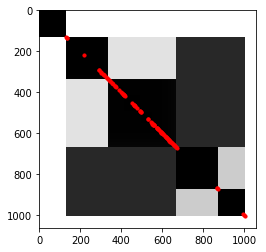

TypeError: integer argument expected, got float

In [168]:
plt.imshow(A, cmap='gray')
for z in range(0,len(l)):
    plt.scatter([int(l[z])],[int(l[z])], color='red', s=10)
    
plt.show()
plt.savefig('output1.JPG')

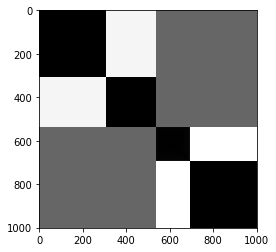

In [164]:
plt.imshow(A, cmap='gray')

In [387]:
for i in range(0,len(x_test)):
    for j in range(0,2):
        if x[i][j]>0.99:
            x[i][j]=int(1)
        else:
            x[i][j]=int(0)
      
(y_test-x.astype(int))

array([[ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 1, -1],
       [ 1, -1],
       [ 0,  0],
       [ 0,  0],
       [ 1, -1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 1,  0],
       [ 1,  0],
       [ 0,  0],
       [ 0,  0],
       [ 1, -1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 1, -1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 1,  0],
       [ 0,  0],
       [ 0,  0],
       [ 1, -1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [-1,  1],
       [ 0,  0

In [369]:
#pred=np.array([])
#for val in model.predict(x_test):
#    if(val[0]>0.99):
 #       np.append(pred,0)
  #  else:
   #     np.append(pred,1)

In [374]:
#pred[pred==1]

array([], dtype=float64)

In [274]:
#imporove accuracy by more epocs till the loss is almost same